## Even More pretrained models in PyTorch

####  https://github.com/Cadene/pretrained-models.pytorch

Upto 7000 layers from 34 ImageNet models



In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import powerlaw

from tqdm import tqdm_notebook as tqdm

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import import_ipynb
import RMT_Util

importing Jupyter notebook from RMT_Util.ipynb


/Users/charleshmartin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.3
scipy version 1.1.0
tensforflow version 1.10.1
keras version 2.2.2
sklearn version 0.19.1
powerlaw version 1.4.3


Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,5]

In [4]:
import pretrainedmodels

In [5]:
# does not work...I made symbolic link instead
# %env TORCH_MODEL_ZOO="~/work-tmp/pretrainedmodels"

### 45 Available models

In [6]:
len(pretrainedmodels.model_names)

45

### Minimum dimension for W

In [7]:
MIN_DIM = 50

### All Linear Models

In [8]:
def count_layers(model):
    """Loops over a pytorch model and counts all the weight matrices, linear, conv2d, and conv2d-slices"""
    num_linear, num_conv2d, num_conv2d_slices = 0, 0, 0
    
    for im, m in enumerate(model.modules()):
        #print(im,m)
        if isinstance(m, nn.Linear):     
            W = np.array(m.weight.data.clone().cpu())
            if W is not None:
                #print(im,m, W.shape)
                num_linear += 1
        elif isinstance(m, nn.Conv2d):
            #print("conv2d")
            Wtensor = np.array(m.weight.data.clone().cpu())
            #print(Wtensor.shape)
            Wmats = RMT_Util.get_conv2D_Wmats(Wtensor)
            #print(im,m)
            num_conv2d += 1
            for W in Wmats:
                #print(W.shape)
                if (np.min(W.shape) >= MIN_DIM):
                    num_conv2d_slices += 1
                
    return num_linear, num_conv2d, num_conv2d_slices
        

In [9]:
pretrainedmodels.fbresnet152(num_classes=1000, pretrained='imagenet')

FBResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.

In [10]:
num_models, num_linear, num_conv2d, num_conv2d_slices = 0, 0, 0, 0

for model_name in tqdm(pretrainedmodels.model_names[3:]):
    print(model_name)
    try:
        model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
        model.eval()
        num_l, num_c, num_cs = count_layers(model)
        num_models += 1
        num_linear += num_l
        num_conv2d += num_c
        num_conv2d_slices += num_cs
        #print("made it")
        #print(num_linear, num_conv2d, num_conv2d_slices)
    except Exception as e: 
        #print(e)
        pass
    
   
print(num_models, num_linear, num_conv2d, num_conv2d_slices)


resnext101_64x4d
inceptionv4
inceptionresnetv2
alexnet
densenet121
densenet169


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


densenet201
densenet161
resnet18
resnet34
resnet50
resnet101
resnet152
inceptionv3
squeezenet1_0
squeezenet1_1
vgg11


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


vgg11_bn
vgg13
vgg13_bn
vgg16
vgg16_bn
vgg19_bn
vgg19
nasnetamobile
nasnetalarge
dpn68
dpn68b
dpn92
dpn98
dpn131
dpn107
xception
senet154
se_resnet50
se_resnet101
se_resnet152
se_resnext50_32x4d
se_resnext101_32x4d
cafferesnet101
pnasnet5large
polynet

34 48 4095 6944


In [11]:
def iter_pytotch_layers(model, min_dim=MIN_DIM):
    """Iterate over a pytorch layers and  weight matrix.  
    Supports linear, conv2d, and conv2d-slices"""
    for im, m in enumerate(model.modules()):
        if isinstance(m, nn.Linear):     
            W = np.array(m.weight.data.clone().cpu())
            if W is not None:
                yield W
        elif isinstance(m, nn.Conv2d):
            Wtensor = np.array(m.weight.data.clone().cpu())
            Wmats = RMT_Util.get_conv2D_Wmats(Wtensor)
            for W in Wmats:
                if (np.min(W.shape) >= min_dim):
                    yield W

In [12]:
alphas, min_svs, Qs = [], [], []

num_models, num_matrices = 0, 0


for model_name in tqdm(pretrainedmodels.model_names):
    try:
        print(model_name)

        model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
        model.eval()
        
        for W in tqdm(iter_pytotch_layers(model)):
            M, N = np.min(W.shape), np.max(W.shape)
            Q = N/M
            Qs.append(Q)

            _, sv, _ = np.linalg.svd(W)
            min_svs.append(np.min(sv))

            evals = sv*sv
            fit = powerlaw.Fit(evals, xmax=np.max(evals), verbose=False)
            alphas.append(fit.alpha)
            num_matrices+=1
            
        num_models+=1           
    
    except:
        print("skipping ", model_name)
        pass

fbresnet152


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


bninception
skipping  bninception
resnext101_32x4d


resnext101_64x4d


inceptionv4


inceptionresnetv2


alexnet


densenet121
skipping  densenet121
densenet169


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


skipping  densenet169
densenet201
skipping  densenet201
densenet161
skipping  densenet161
resnet18


resnet34


resnet50


resnet101


resnet152


inceptionv3


squeezenet1_0


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


squeezenet1_1


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:1178: RuntimeWarning: overflow encountered in double_scalars
  return (self.alpha-1) * self.xmin**(self.alpha-1)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:825: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


vgg11


vgg11_bn


vgg13


vgg13_bn


vgg16


vgg16_bn


vgg19_bn


vgg19


nasnetamobile


nasnetalarge


dpn68


dpn68b
skipping  dpn68b
dpn92
skipping  dpn92
dpn98


dpn131


dpn107
skipping  dpn107
xception
skipping  xception
senet154


se_resnet50


se_resnet101


se_resnet152


se_resnext50_32x4d


se_resnext101_32x4d


cafferesnet101


pnasnet5large


polynet


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:1174: RuntimeWarning: overflow encountered in power
  return x**-self.alpha


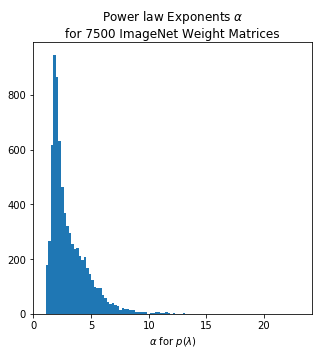

In [34]:
plt.hist(alphas, bins=100);
plt.title(r'Power law Exponents $\alpha$'+"\nfor 7500 ImageNet Weight Matrices")
plt.xlabel(r'$\alpha$ for $p(\lambda)~\lambda^{-alpha}$')
plt.savefig("img/even-more-alphas.png")
plt.show()

In [33]:
a = np.array(alphas)
100.0*len(a[a<5])/len(a), 100.0*len(a[a<1.5])/len(a)

(87.91150206584032, 5.557776889244303)

## Rank Loss


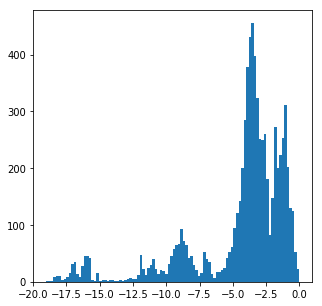

In [39]:
plt.hist(np.log10(min_svs), bins=100);

### Recompute Qs...screwd it up above somehow ?

In [70]:
Qs = []
for model_name in tqdm(pretrainedmodels.model_names):
    try:
        print(model_name)

        model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
        model.eval()
        
        for W in tqdm(iter_pytotch_layers(model)):
            M, N = np.min(W.shape), np.max(W.shape)
            Q = N/M
            Qs.append(Q)
    except:
        print("skipping ", model_name)
    pass

Qs = np.array(Qs)

fbresnet152


bninception
skipping  bninception
resnext101_32x4d


resnext101_64x4d


inceptionv4


inceptionresnetv2


alexnet


densenet121
skipping  densenet121


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


densenet169
skipping  densenet169
densenet201
skipping  densenet201
densenet161
skipping  densenet161
resnet18


resnet34


resnet50


resnet101


resnet152


inceptionv3


squeezenet1_0


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


squeezenet1_1


vgg11


vgg11_bn


vgg13


vgg13_bn


vgg16


vgg16_bn


vgg19_bn


vgg19


nasnetamobile


nasnetalarge


dpn68


dpn68b
skipping  dpn68b
dpn92
skipping  dpn92
dpn98


dpn131


dpn107
skipping  dpn107
xception
skipping  xception
senet154


se_resnet50


se_resnet101


se_resnet152


se_resnext50_32x4d


se_resnext101_32x4d


cafferesnet101


pnasnet5large


polynet


### Rank Loss, Q>1.1

In [76]:
ids = np.where(Qs[Qs>1.1])
MSV = np.array(min_svs)[ids]

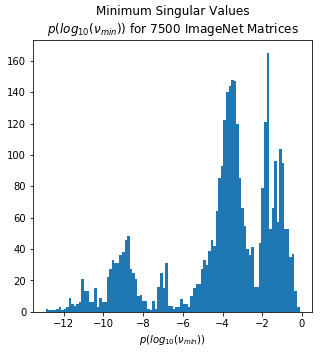

In [88]:
plt.hist(np.log10(MSV), bins=100);
plt.title("Minimum Singular Values\n"+r'$p(log_{10}(\nu_{min}))$ for 7500 ImageNet Matrices')
plt.xlabel(r'$p(log_{10}(\nu_{min}))$')
plt.savefig("img/even-more-rank-loss.png")
plt.show()

In [91]:
len(np.log10(MSV)[np.log10(MSV)<-8])/len(MSV)

0.15912366676275583